In [1]:
from functions import *
import pandas as pd
from fbprophet import Prophet


/home/charles/Documents/MT/fbprophet/functions.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
Importing plotly failed. Interactive plots will not work.


In [6]:
solar_train = pd.read_csv("../data/train_solar.csv")
solar_test = pd.read_csv("../data/test_solar.csv")

In [8]:
solar_train = pd.concat([solar_train.timestamp, solar_train.energy], axis = 1)
solar_train = solar_train.rename(columns={"timestamp": "ds", "energy": "y"})

In [7]:
solar_test = pd.concat([solar_test.timestamp, solar_test.energy], axis = 1)
solar_test = solar_test.rename(columns={"timestamp": "ds", "energy": "y"})

In [47]:
fp = Prophet(interval_width=0.9)
fp.fit(solar_train.iloc[:19000])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [48]:
solar_train.iloc[:19000].tail()

,ds,y
18995,2019-10-12 20:45:00,0.0
18996,2019-10-12 21:00:00,0.0
18997,2019-10-12 21:15:00,0.0
18998,2019-10-12 21:30:00,0.0
18999,2019-10-12 21:45:00,0.0


In [55]:
future = fp.make_future_dataframe(periods=392, freq='15min')
future.tail()

,ds
19387,2019-10-16 22:45:00
19388,2019-10-16 23:00:00
19389,2019-10-16 23:15:00
19390,2019-10-16 23:30:00
19391,2019-10-16 23:45:00


In [56]:
forecast = fp.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19387,2019-10-16 22:45:00,-2.167448,-4.879809,0.746400
19388,2019-10-16 23:00:00,-2.181981,-5.222107,0.720881
19389,2019-10-16 23:15:00,-2.188914,-5.345842,0.747873
19390,2019-10-16 23:30:00,-2.187519,-5.104618,0.870365
19391,2019-10-16 23:45:00,-2.177947,-4.936253,0.629298


In [51]:
solar_test.y.shape

(6296,)

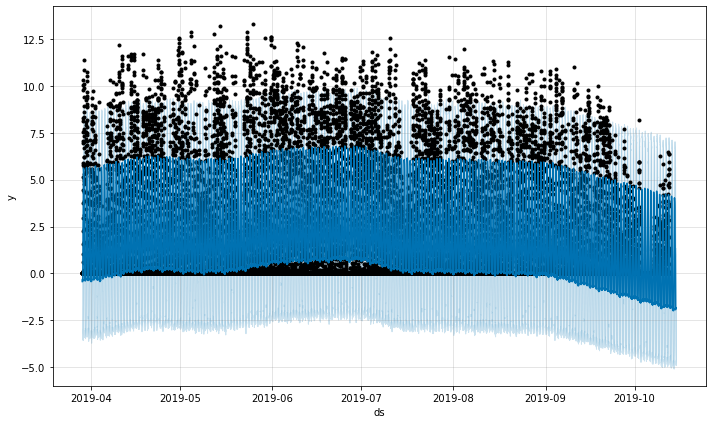

In [52]:
fig = fp.plot(forecast)

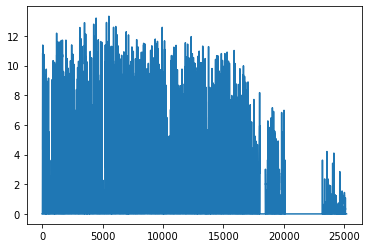

In [45]:
plt.plot(solar_train.y.to_numpy())

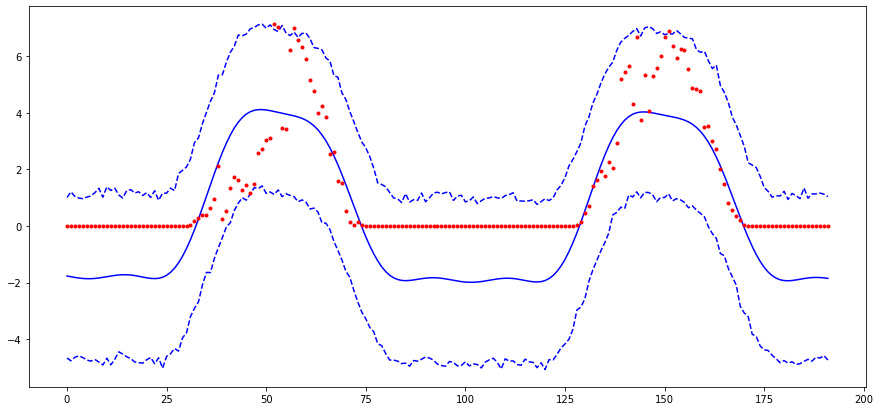

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,7))
plt.plot(forecast.yhat.to_numpy()[19000:], 'b-')
plt.plot(forecast.yhat_lower.to_numpy()[19000:], 'b--')
plt.plot(forecast.yhat_upper.to_numpy()[19000:], 'b--')

plt.plot(solar_train.y.to_numpy()[19000:19192],'r.')

#plt.ylim( 10000, -10000)

In [54]:
get_eval(solar_train.y.iloc[19000:19192], forecast.yhat.to_numpy()[19000:])

MSE: 2.7038986354191796
MAE: 1.4666394419512152
r2_score: 0.40957531232897193
